In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split



In [2]:
import sys
import os

# Get the parent directory of the current file (notebook)
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
# Add the parent directory to sys.path
sys.path.append(parent_dir)
from infra.data_loader import DataLoader
data_loader_test = DataLoader('')
content = data_loader_test._read_docx(f'{parent_dir}/data/תיאור התמונות.docx')
data = data_loader_test._extract_data(content)

distances_df = pd.read_csv(f"{parent_dir}/data/ground_truth_distances.csv")

In [3]:
ground_truth_df = pd.DataFrame([data])
ground_truth_df

,תמונה 1,תמונה 2,תמונה 3,תמונה 4,תמונה 5,תמונה 6,תמונה 7,תמונה 8,תמונה 9,תמונה 10,תמונה 11,תמונה 12,תמונה 13,תמונה 14
0,ילד יושב ליד שולחן ומביט בכינור המוצב על השולח...,"סצנה כפרית עם אישה מחזיקה ספר בחזית. ברקע, גבר...",ילד מצטופף ליד ספה. על הרצפה לידו נמצא חפץ דו-...,אישה אוחזת בכתפיו של גבר שפונה ממנה.,אישה מביטה לתוך חדר מסף דלת.,אישה מבוגרת עומדת במקביל לחלון. מאחוריה גבר צע...,ילדה צעירה יושבת על ספה ומחזיקה בובה בידיה. מא...,ילד צעיר בחזית בוהה ישירות מחוץ לתמונה. ברקע ת...,ארבעה גברים בשדה שוכבים זה מול זה.,אדם אחד מחזיק את ראשו כנגד כתפו של אדם אחר. מי...,אדם עם ידו מורמת עומד מעל ילד השוכב על מיטה בע...,ילד יושב בפתח של בקתת עץ.,צללית של אדם מול חלון,אישה עומדת ליד דלת פתוחה כשיד אחת אוחזת בצד הד...


In [4]:
distances_df.head()

,תמונה 1,תמונה 2,תמונה 3,תמונה 4,תמונה 5,תמונה 6,תמונה 7,תמונה 8,תמונה 9,תמונה 10,תמונה 11,תמונה 12,תמונה 13,תמונה 14,file_name,label
0,0.566962,0.585865,0.654433,0.522563,0.516626,0.628582,0.669026,0.661970,0.587222,0.572410,0.614919,0.600058,0.549366,0.589052,ש16.docx,0
1,0.525855,0.631806,0.580592,0.549767,0.557294,0.536219,0.681729,0.648934,0.599493,0.605749,0.527505,0.592921,0.519440,0.609815,י20.docx,0
2,0.542138,0.628878,0.622527,0.510161,0.540841,0.616226,0.648178,0.661125,0.626441,0.633731,0.600327,0.580142,0.526667,0.624867,ש4.docx,0
3,0.577814,0.577623,0.697502,0.492824,0.459957,0.580962,0.602264,0.627524,0.551496,0.565675,0.540799,0.611534,0.424131,0.544731,י16.docx,0
4,0.520636,0.515395,0.502712,0.499289,0.498142,0.578297,0.633887,0.670567,0.551784,0.614365,0.550647,0.596818,0.517766,0.585009,ש20.docx,0


In [ ]:
df = distances_df.copy()

# Create a grid of boxplots
features = df.columns.drop(['label', 'file_name'])  # Exclude the 'label' column

# Determine the number of rows and columns for the grid
num_features = len(features)
num_cols = 2
num_rows = (num_features + 1) // num_cols

# Increase the figure size for better visibility
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Flatten axes array if there are multiple rows
axes = axes.flatten()

# Plot each feature in a separate subplot
for i, feature in enumerate(features):
    sns.boxplot(x='label', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}', fontsize=14)
    axes[i].set_xlabel('Label', fontsize=12)
    axes[i].set_ylabel(feature, fontsize=12)

# Remove any empty subplots (if the number of features is odd)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# t-test

In [ ]:
# Significance level
alpha = 0.05
successful_columns_ttest = []
# Loop through each column and perform t-test
for col in distances_df.columns[:-2]:  # Exclude 'label'
    group_0 = distances_df[distances_df['label'] == 0][col]
    group_1 = distances_df[distances_df['label'] == 1][col]
    
    # Perform t-test
    t_stat, p_val = ttest_ind(group_0, group_1, equal_var=False)
    
    # Hypothesis and conclusion
    print(f"\nTesting {col}:")
    print("Null Hypothesis: The means of the two groups (label = 0 and label = 1) are equal.")
    print("Alternative Hypothesis: The means of the two groups are different.")
    
    print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")
    
    if p_val < alpha:
        print(f"Result: Reject the null hypothesis (p < {alpha}). The feature '{col}' has a statistically significant effect on the label.\n")
        successful_columns_ttest.append(col)  # Save successful column name
    else:
        print(f"Result: Fail to reject the null hypothesis (p >= {alpha}). The feature '{col}' does not have a statistically significant effect on the label.\n")

print("\nSuccessful Columns:", successful_columns_ttest)

# Logistic Regression

In [ ]:
import statsmodels.api as sm

# Logistic Regression
X = distances_df.drop(columns=['label', 'file_name'])
y = distances_df['label']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model on the training set
model = sm.Logit(y_train, X_train).fit()


# Hypotheses and significance tracking
alpha = 0.15
successful_columns_logistic_regression = []  

print("\nHypotheses for Logistic Regression:")
print("Null Hypothesis: The coefficient of a feature is zero (no effect on the label).")
print("Alternative Hypothesis: The coefficient of a feature is not zero (the feature affects the label).")

# Extract p-values from the model summary
p_values = model.pvalues

for feature, p_val in p_values.items():
    print(f"\nFeature: {feature}, P-value: {p_val:.4f}")
    
    if p_val < alpha:
        print(f"Result: Reject the null hypothesis (p < {alpha}). The feature '{feature}' has a statistically significant effect on the label.")
        successful_columns_logistic_regression.append(feature)  # Save successful column name
    else:
        print(f"Result: Fail to reject the null hypothesis (p >= {alpha}). The feature '{feature}' does not have a statistically significant effect on the label.")

print("\nSuccessful Columns:", successful_columns_logistic_regression)

In [ ]:
# Print the model summary
print(model.summary())


In [ ]:
# Extracting model coefficients
print("\nModel Coefficients:")
print(model.params)

In [ ]:
# Confidence intervals of coefficients
print("\nConfidence Intervals for Coefficients:")
print(model.conf_int())


In [ ]:

# Model performance on the training set
print("\n--- Training Set Performance ---")

# Training set predictions and evaluation
train_pred_probs = model.predict(X_train)
train_pred = (train_pred_probs > 0.5).astype(int)

# Classification report for training set
print("\nTraining Set Classification Report:")
print(classification_report(y_train, train_pred))

# Model performance on the test set
print("\n--- Test Set Performance ---")

# Test set predictions and evaluation
test_pred_probs = model.predict(X_test)
test_pred = (test_pred_probs > 0.5).astype(int)

# Classification report for test set
print("\nTest Set Classification Report:")
print(classification_report(y_test, test_pred))



In [ ]:

# Test Set: Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Test Set Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()




In [ ]:
# Test Set: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred_probs)
roc_auc = roc_auc_score(y_test, test_pred_probs)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Set Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Plot Coefficients
coef_df = pd.DataFrame({
    'Feature': model.params.index,
    'Coefficient': model.params.values
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Logistic Regression Coefficients')
plt.show()

# correlation matrix

In [ ]:
# Compute correlation matrix (excluding 'file_name' and 'label' if it's in the DataFrame)
corr_matrix = distances_df.drop(columns=["file_name"]).corr()

print("Hypothesis for Correlation Test:")
print("Null Hypothesis: There is no correlation between the feature and the label.")
print("Alternative Hypothesis: There is a correlation between the feature and the label.")

# Extract correlation with label
corr_with_label = corr_matrix['label'].sort_values(ascending=False)

# Threshold for moderate correlation
threshold = 0.3

# List to store the names of features with significant correlation
significant_features_corr_matrix = []

# Loop over correlations
for feature, corr_value in corr_with_label.items():
    if feature == 'label':
        continue  # Skip self-correlation
    
    print(f"\nFeature: {feature}, Correlation: {corr_value:.4f}")
    
    # Hypothesis test result
    if abs(corr_value) > threshold:
        print(f"Result: Reject the null hypothesis. There is a significant correlation between {feature} and the label.")
        significant_features_corr_matrix.append(feature)
    else:
        print(f"Result: Fail to reject the null hypothesis. There is no significant correlation between {feature} and the label.")

print(f"\nSignificant Features: {significant_features_corr_matrix}")

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


# columns_to_evaluate

In [23]:
successful_columns_ttest


['תמונה 1',
 'תמונה 4',
 'תמונה 6',
 'תמונה 7',
 'תמונה 8',
 'תמונה 9',
 'תמונה 10',
 'תמונה 12',
 'תמונה 14']

In [24]:
successful_columns_logistic_regression

['תמונה 2', 'תמונה 4', 'תמונה 7', 'תמונה 9', 'תמונה 11', 'תמונה 13']

In [25]:
significant_features_corr_matrix

['תמונה 9', 'תמונה 14', 'תמונה 6', 'תמונה 4', 'תמונה 8', 'תמונה 7']

In [26]:


# Get all the columns except 'label'
columns_to_evaluate = distances_df.columns.drop('label')

# Create the summary DataFrame for those columns
summary_df = pd.DataFrame(index=columns_to_evaluate)

# Fill in results for each test
summary_df['ttest_success'] = summary_df.index.isin(successful_columns_ttest)
summary_df['logistic_regression_success'] = summary_df.index.isin(successful_columns_logistic_regression)
summary_df['correlation_matrix_success'] = summary_df.index.isin(significant_features_corr_matrix)

# Convert boolean values to 'Yes'/'No' for better readability
summary_df = summary_df.replace({True: 'Yes', False: 'No'})

print(summary_df)

          ttest_success logistic_regression_success correlation_matrix_success
תמונה 1             Yes                          No                         No
תמונה 2              No                         Yes                         No
תמונה 3              No                          No                         No
תמונה 4             Yes                         Yes                        Yes
תמונה 5              No                          No                         No
תמונה 6             Yes                          No                        Yes
תמונה 7             Yes                         Yes                        Yes
תמונה 8             Yes                          No                        Yes
תמונה 9             Yes                         Yes                        Yes
תמונה 10            Yes                          No                         No
תמונה 11             No                         Yes                         No
תמונה 12            Yes                          No 

/var/folders/b1/frm8p4wx2v1_r2r5qhspvnm80000gn/T/ipykernel_2746/3405560470.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  plot_df = summary_df.replace({'Yes': 1, 'No': 0})


Text(70.58159722222221, 0.5, 'Features')

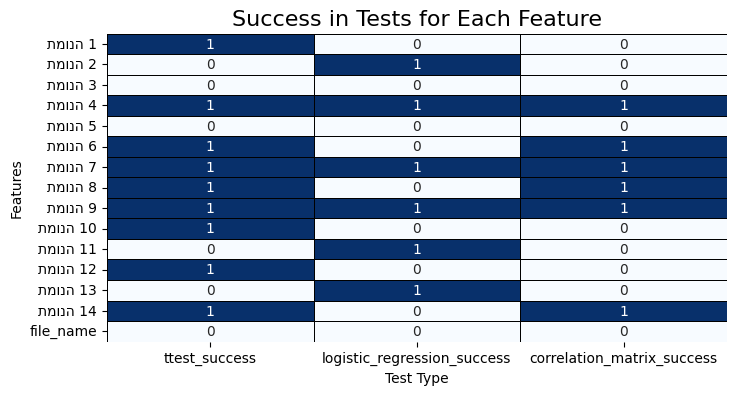

In [27]:
# Convert 'Yes'/'No' to 1 and 0 for better plotting
plot_df = summary_df.replace({'Yes': 1, 'No': 0})

# Create the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(plot_df, annot=True, cmap='Blues', cbar=False, linewidths=0.5, linecolor='black')

# Add labels and title
plt.title('Success in Tests for Each Feature', fontsize=16)
plt.xlabel('Test Type')
plt.ylabel('Features')